<a href="https://colab.research.google.com/github/amol004/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    - **Mobile Price Range Prediction**



##### **Name** - Amol Thakur
##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **E-mail** - amolthakur004@gmail.com
# **GitHub Link -** https://github.com/amol004/Mobile-Price-Range-Prediction.git

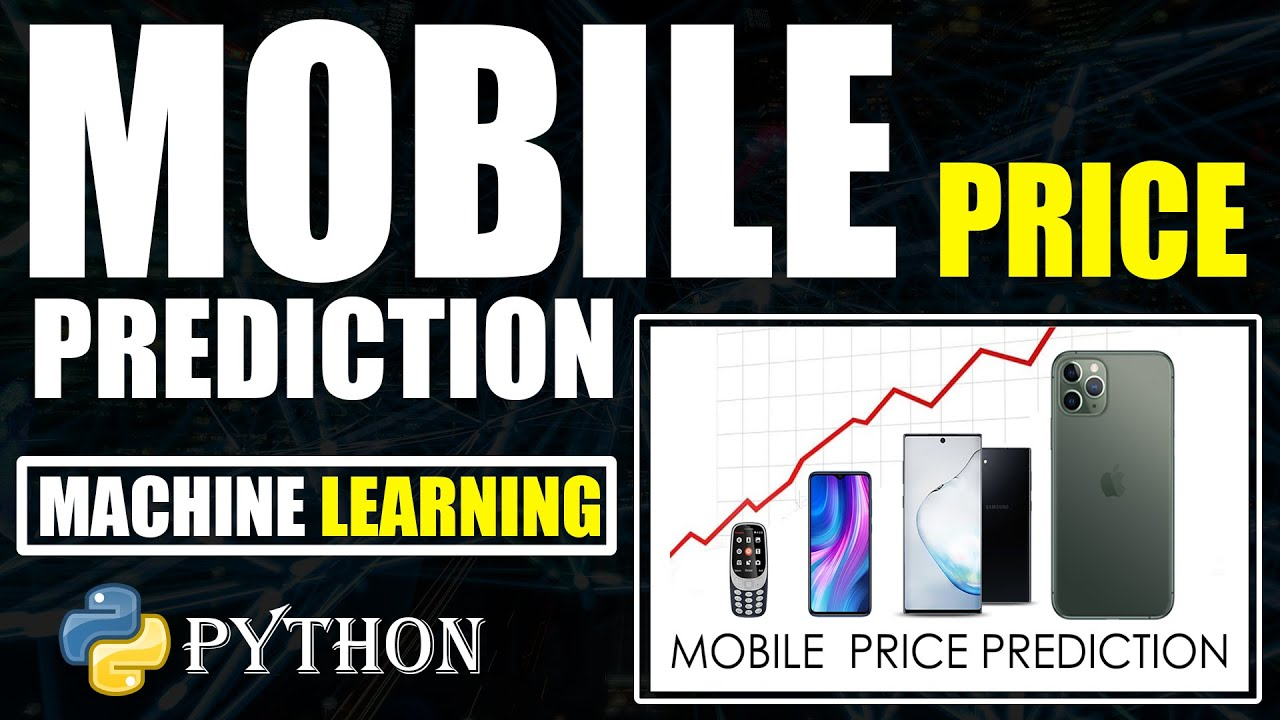

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# used for numerical operations
import numpy as np
# for data manipulation
import pandas as pd
# for data vizulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
# for visualizing missing/null values in our data frame
import missingno as msno
# for manipulation of data with type datetime
from datetime import datetime
# used to remove warnings for better asthetics
import warnings
warnings.filterwarnings('ignore')
# to increase the number of visible columns in our data frame
from google.colab.data_table import DataTable
DataTable.max_columns = 30
#SKLEARN#
# preprocessing technique in scikit-learn that scales the features of a dataset to have zero mean and unit variance.
from sklearn.preprocessing import StandardScaler
# preprocessing technique in scikit-learn that converts categorical variables into numerical values using one-hot encoding.
from sklearn.preprocessing import OneHotEncoder
# function in scikit-learn that splits a dataset into training and testing sets for machine learning model evaluation.
from sklearn.model_selection import train_test_split
# method in scikit-learn for hyperparameter tuning that performs randomized search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV
# method in scikit-learn for hyperparameter tuning that performs exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV
# function in scikit-learn that performs k-fold cross-validation for model evaluation, returning an array of scores for each fold.
from sklearn.model_selection import cross_val_score
# linear regression model in scikit-learn that predicts the target variable based on linear relationship between input features and target.
from sklearn.linear_model import LinearRegression
# it is a linear regression model in scikit-learn that performs L2 regularization to prevent overfitting.
from sklearn.linear_model import Ridge
# a linear regression model in scikit-learn that performs L1 regularization to prevent overfitting and feature selection.
from sklearn.linear_model import Lasso
#  module in scikit-learn that provides various evaluation metrics for model performance, such as accuracy, precision, recall, and F1-score.
from sklearn import metrics
# metric in scikit-learn that calculates the coefficient of determination (R2) to evaluate the goodness-of-fit of a regression model.
from sklearn.metrics import r2_score
# it is a metric in scikit-learn that calculates the mean squared error (MSE) between predicted and actual values to evaluate the performance of a regression model.
from numpy import math
import pandas as pd
from scipy.stats import *
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,classification_report



### Dataset Loading

In [4]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone Project-1 Google Play store analysis/data_mobile_price_range.csv', header= 0,encoding= 'unicode_escape')


### Dataset First View

In [6]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
np.shape(df)

(2000, 21)

### Dataset Information

In [8]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [9]:
# Dropping duplicate values if any present in our dataframe meanwhile retaining the first value
df=df.drop_duplicates(keep='first')

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

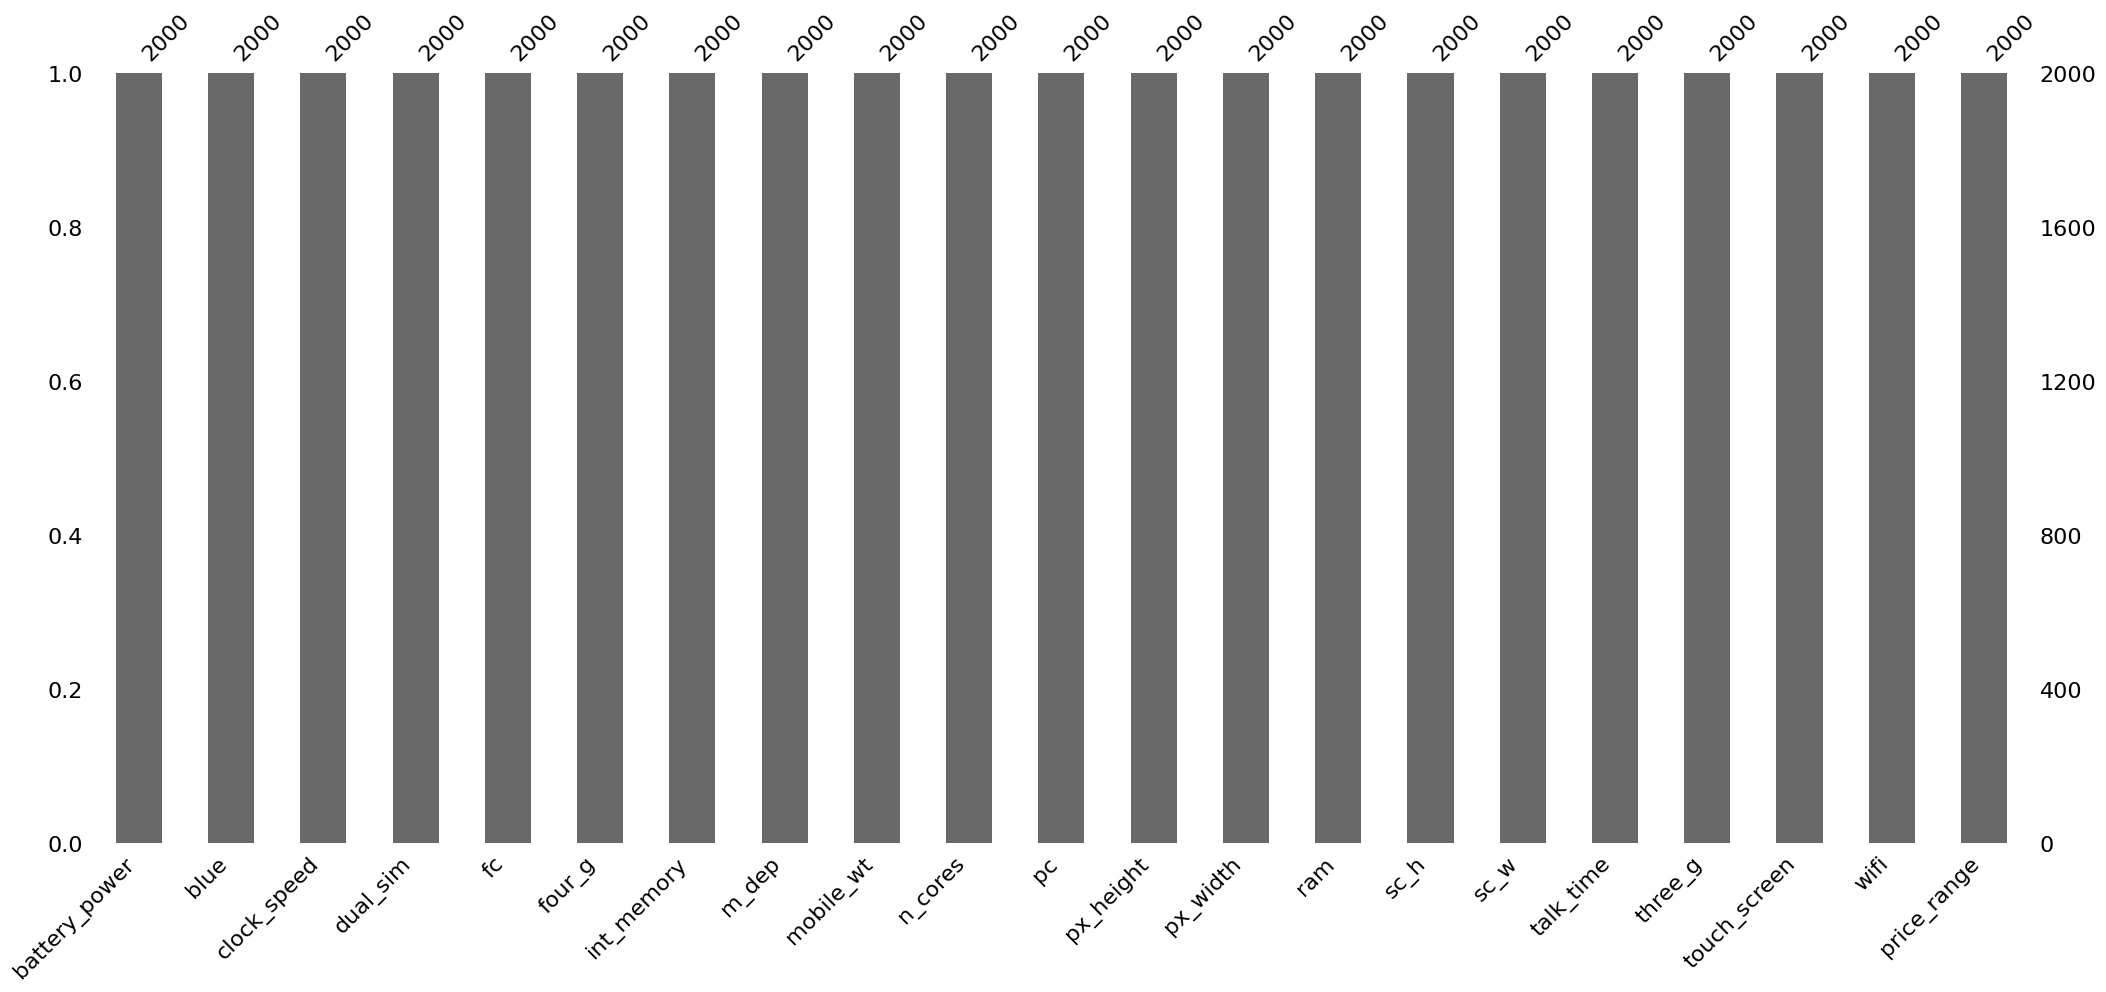

In [12]:
# Visualizing the missing values
# Let's plot all the null values present in our dataframe using bargraph and missingno library
plt.figure(figsize=(10,8)) # used to provide a specific size to our graph
msno.bar(df);

### What did you know about your dataset?

There are no null values and duplicate values present in our dataset which makes analysis much easier

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description

id:ID

battery_power:Total energy a battery can store in one time measured in mAh

blue:Has bluetooth or not

clock_speed:speed at which microprocessor executes instructions

dual_sim:Has dual sim support or not

fc:Front Camera mega pixels

four_g:Has 4G or not

int_memory:Internal Memory in Gigabytes

m_dep:Mobile Depth in cm

mobile_wt:Weight of mobile phone

n_cores:Number of cores of processor

pc:Primary Camera mega pixels

px_height:Pixel Resolution Height

px_width:Pixel Resolution Width

ram:Random Access Memory in Megabytes

sc_h:Screen Height of mobile in cm

sc_w:Screen Width of mobile in cm

talk_time:longest time that a single battery charge will last when you are on call

three_g:Has 3G or not

touch_screen:Has touch screen or not

wifi:Has wifi or not

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
def unique_values(df):
    for col in df.columns:
        unique_count = df[col].nunique()
        a=print(f"COLUMN NAME ({col}): {unique_count} unique values")
    return a

In [16]:
unique_values(df)

COLUMN NAME (battery_power): 1094 unique values
COLUMN NAME (blue): 2 unique values
COLUMN NAME (clock_speed): 26 unique values
COLUMN NAME (dual_sim): 2 unique values
COLUMN NAME (fc): 20 unique values
COLUMN NAME (four_g): 2 unique values
COLUMN NAME (int_memory): 63 unique values
COLUMN NAME (m_dep): 10 unique values
COLUMN NAME (mobile_wt): 121 unique values
COLUMN NAME (n_cores): 8 unique values
COLUMN NAME (pc): 21 unique values
COLUMN NAME (px_height): 1137 unique values
COLUMN NAME (px_width): 1109 unique values
COLUMN NAME (ram): 1562 unique values
COLUMN NAME (sc_h): 15 unique values
COLUMN NAME (sc_w): 19 unique values
COLUMN NAME (talk_time): 19 unique values
COLUMN NAME (three_g): 2 unique values
COLUMN NAME (touch_screen): 2 unique values
COLUMN NAME (wifi): 2 unique values
COLUMN NAME (price_range): 4 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.

In [18]:
# function for selecting all the numerical columns
def numerical_col(df):
  c = []
  for col in df.columns:
    if df[col].nunique() >= 5:
       c.append(col)
  return c


In [19]:
numerical_col(df)

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [20]:
# function for selecting all the categorical columns
def categorical_col(df):
  d = []
  for col in df.columns:
    if df[col].nunique() <= 4:
       d.append(col)
  return d

In [21]:
categorical_col(df)

['blue',
 'dual_sim',
 'four_g',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

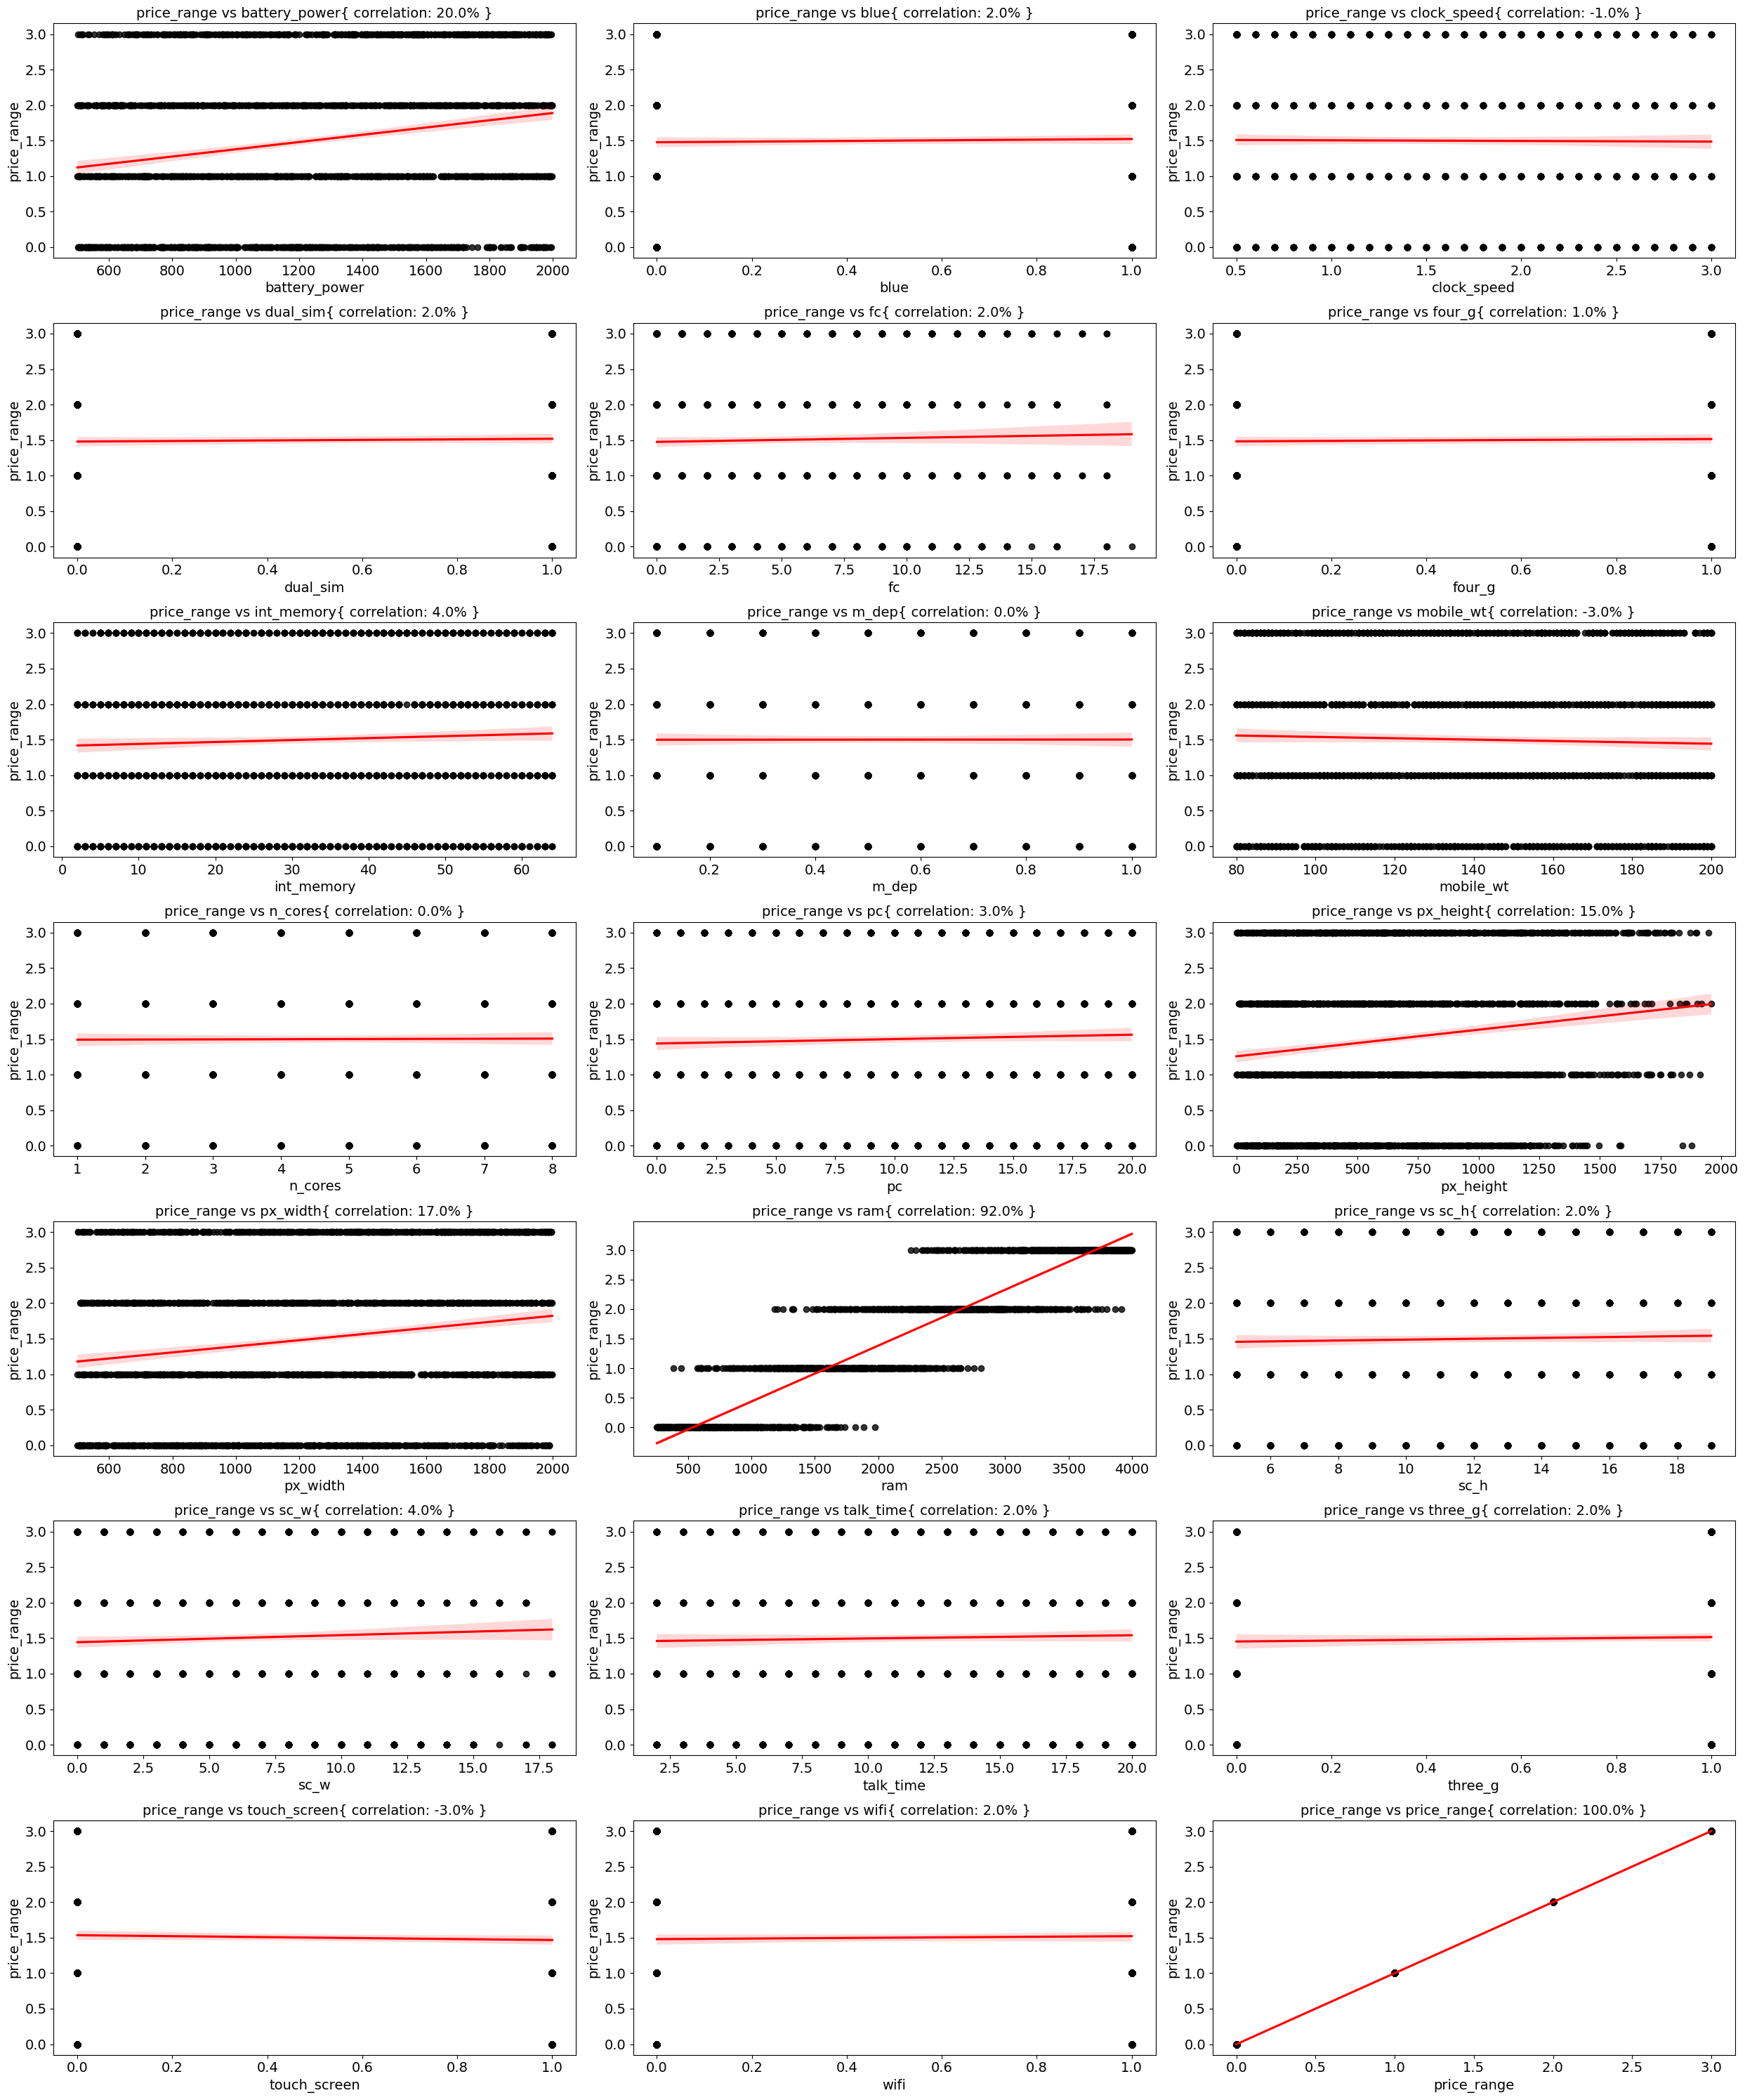

In [22]:
# Chart - 1 visualization code
fig, axs = plt.subplots(7, 3, figsize=(25,30), facecolor="white")
axs = axs.ravel()
for i, col in enumerate(df.columns):
    sns.regplot(x=col, y="price_range", data=df, ax=axs[i], scatter_kws={"color": "black"}, line_kws={"color": "red"})
    axs[i].tick_params(axis='x', colors='black', labelsize=14)
    axs[i].tick_params(axis='y', colors='black', labelsize=14)
    axs[i].set_xlabel(col, color='black', fontsize=14)
    axs[i].set_ylabel("price_range", color='black', fontsize=14)
    independant = df[col]
    target = df['price_range']
    correlation = independant.corr(target)
    axs[i].set_title('price_range vs ' + col + '{ correlation: ' + str((round(correlation,2))*100) + '% }', color='black',fontsize=14);
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

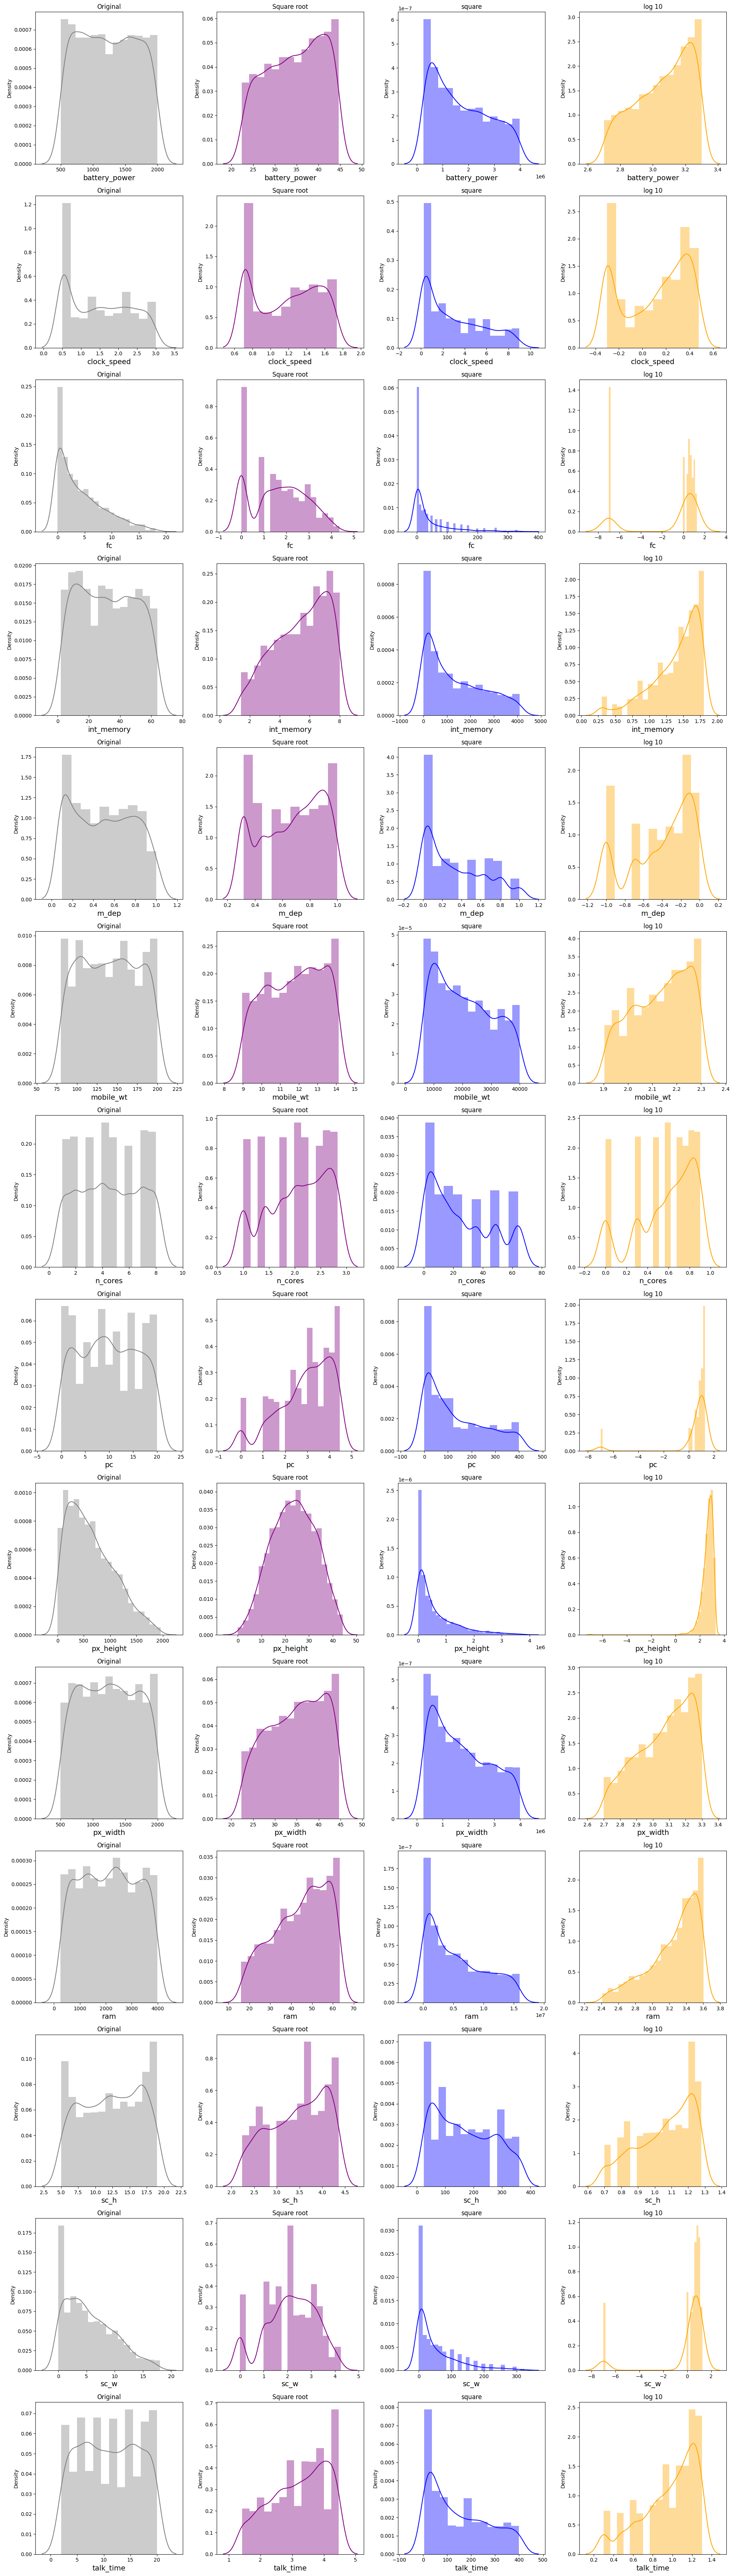

In [23]:
# Chart - 2 visualization code
# Checking best transformation for every numerical column in our dataset
fig, axes = plt.subplots(nrows=len(numerical_col(df)), ncols=4, figsize=(20, 5*len(numerical_col(df))))
for i, col in enumerate(numerical_col(df)):
    sns.distplot((df[col]), ax=axes[i, 0], color='grey').set_title("Original") # Original column
    sns.distplot(np.sqrt(df[col]), ax=axes[i, 1], color='purple').set_title("Square root")  # applying Square root transformation
    sns.distplot(np.log10(df[col]+0.0000001), ax=axes[i, 3], color='orange').set_title("log 10")  # applying log transformation
    sns.distplot((df[col]**2), ax=axes[i, 2], color='blue').set_title("square")  # applying Square transformation
    axes[i, 0].set_xlabel(col, fontsize=14)
    axes[i, 1].set_xlabel(col, fontsize=14)
    axes[i, 2].set_xlabel(col, fontsize=14)
    axes[i, 3].set_xlabel(col, fontsize=14)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

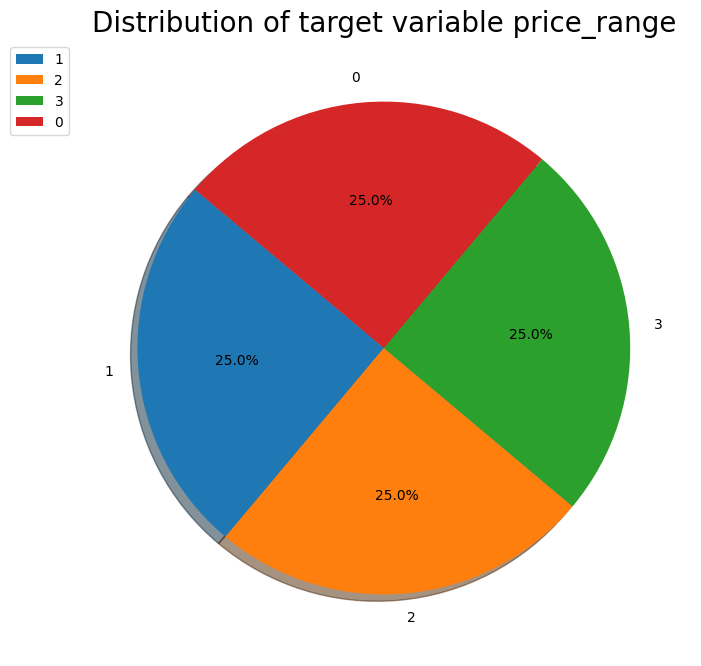

In [24]:
# Chart - 3 visualization code
plt.rcParams['figure.figsize']=(8,8) # figure size
plt.pie(df['price_range'].value_counts(),labels=['1','2','3','0'], autopct='%1.1f%%', shadow=True, startangle=140);
plt.title('Distribution of target variable price_range',fontsize=20) # Title
plt.legend(bbox_to_anchor=(0,1)); # Used to display and adjust the position of information box that is present on the left side of this pie chart

In [25]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

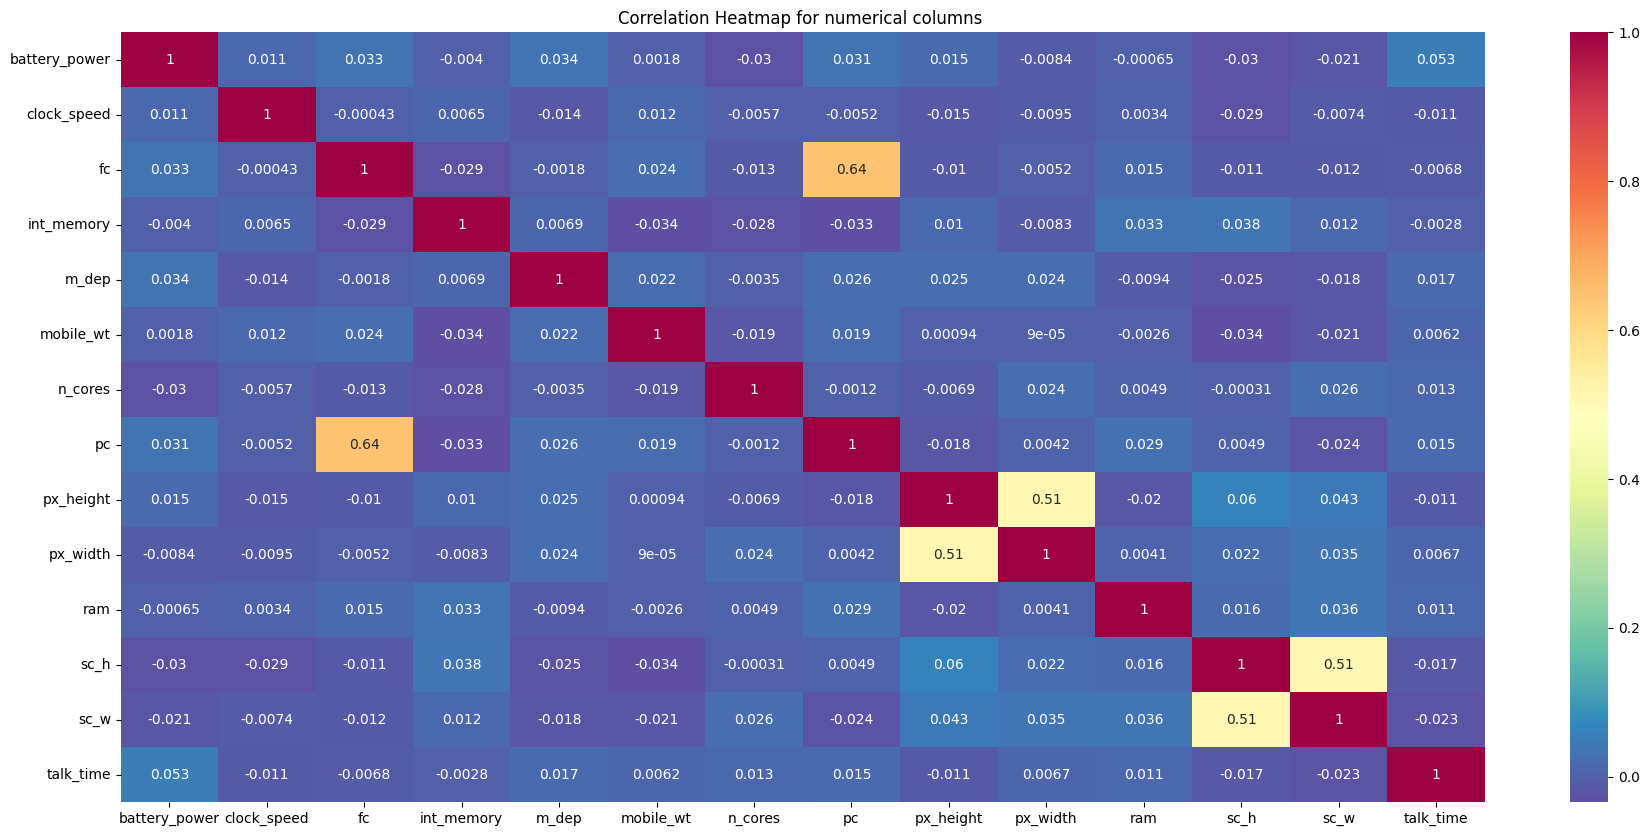

In [26]:
# Chart - 4 visualization code
# plotting heatmap using seaborn to establish relations between features
plt.figure(figsize=(22,10))
# title
plt.title("Correlation Heatmap for numerical columns ")
sns.heatmap(df[numerical_col(df)].corr(),annot=True,cmap='Spectral_r');

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [27]:
# Chart - 5 visualization code
ff=df[categorical_col(df)]

In [28]:
ff=ff.drop(['price_range'],axis=1)

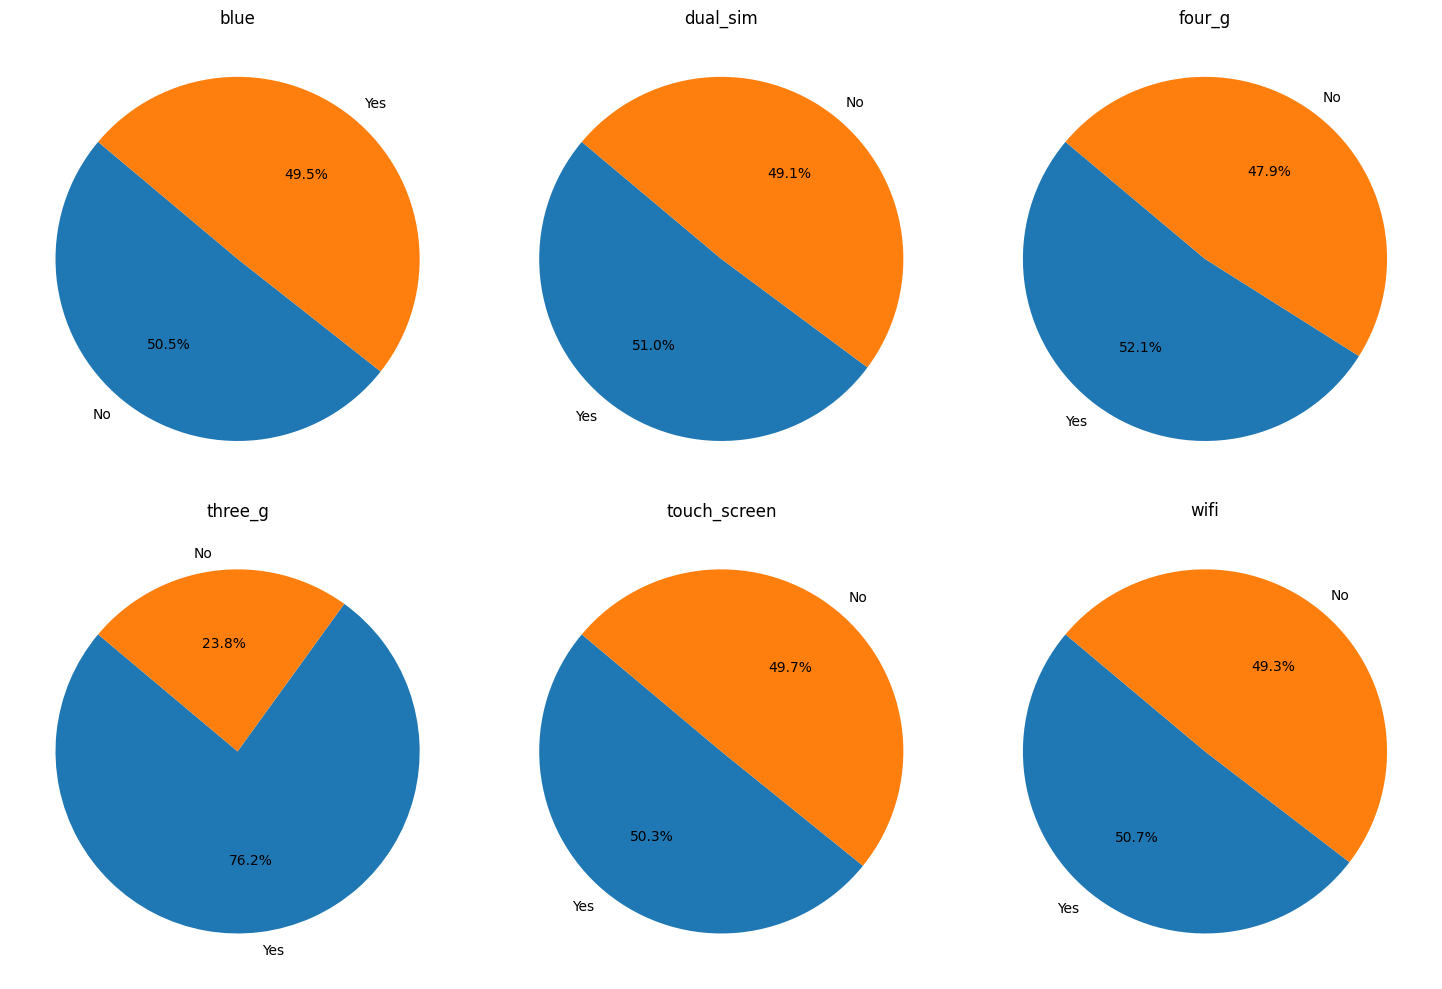

In [29]:
# Mapping for label replacement
label_mapping = {0: 'No', 1: 'Yes'}

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Loop through columns and create pie charts
for idx, column in enumerate(ff.columns):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    counts = df[column].value_counts()
    labels = [label_mapping[val] for val in counts.index]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(column)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [30]:
# Chart - 6 visualization code
bb=df.groupby('price_range')['battery_power'].mean()
bb

price_range
0    1116.902
1    1228.868
2    1228.320
3    1379.984
Name: battery_power, dtype: float64

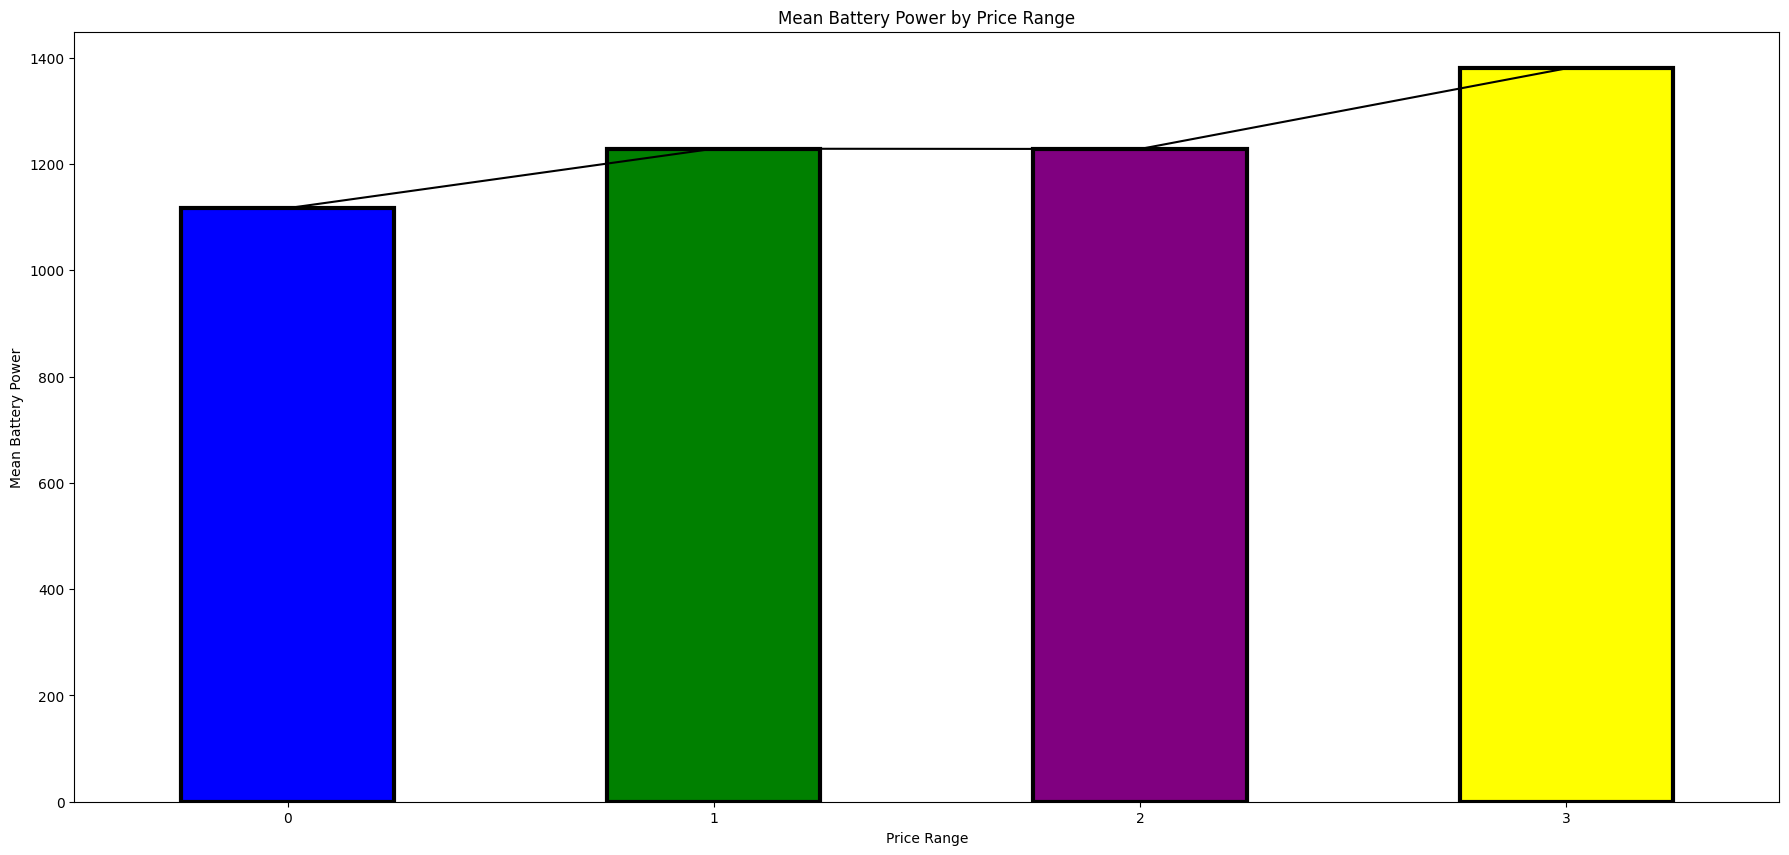

In [31]:
# Create a bar graph with custom colors
plt.figure(figsize=(22,10))
bb.plot(color='black') # line color
bb.plot(kind='bar', color=['blue', 'green', 'purple','yellow'],linewidth=3,edgecolor='black')
plt.title('Mean Battery Power by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Mean Battery Power')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

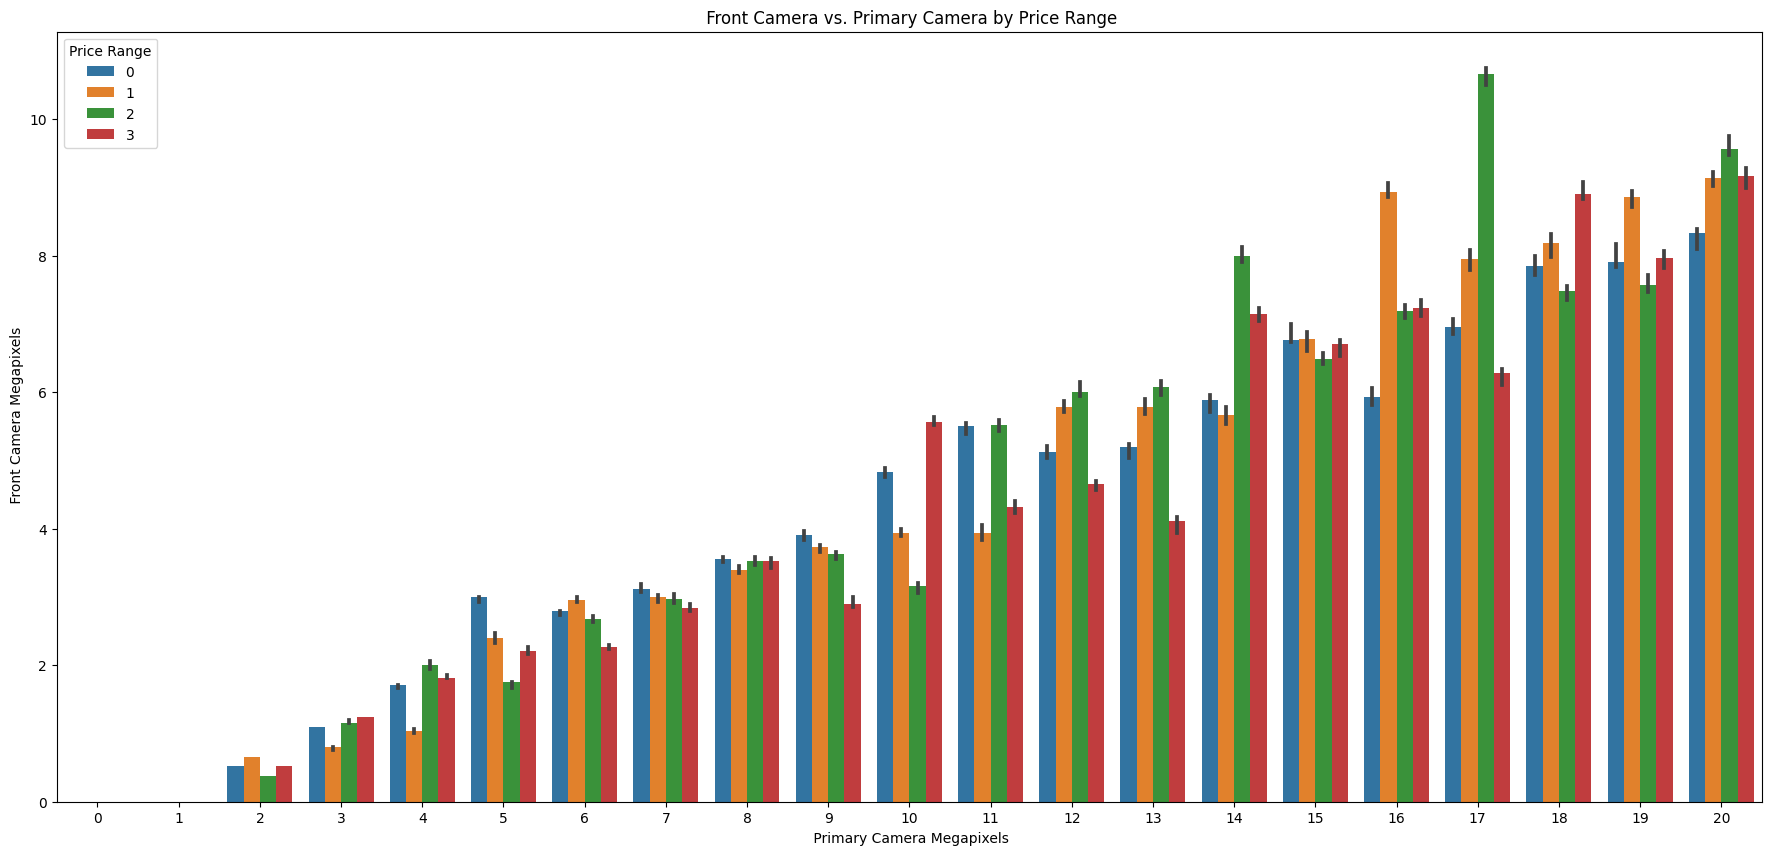

In [32]:
# Chart - 7 visualization code
# Create a bar plot
plt.figure(figsize=(22,10))
sns.barplot(x="pc", y="fc", hue="price_range", data=df, ci=10)
plt.title(' Front Camera vs. Primary Camera by Price Range')
plt.xlabel(' Primary Camera Megapixels')
plt.ylabel(' Front Camera Megapixels')
plt.legend(title='Price Range')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [36]:
# Handling Missing Values & Missing Value Imputation
# Handling Missing Values & Missing Value Imputation
df.isnull().sum() # there are no missing values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There's no need to use any technique as there's no missing data.

### 2. Handling Outliers

In [37]:
# Handling Outliers & Outlier treatments
def outlier_detection(df,num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 25))

    for i, column in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols

        if num_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]

        ax.boxplot(df[column])  # Generate the box plot
        ax.set_title(f'Outliers for {column}')  # Set the title
        ax.set_xlabel(column)  # Set the x-axis label
        ax.set_ylabel('Value ----->')  # Set the y-axis label

    plt.tight_layout()
    plt.show()

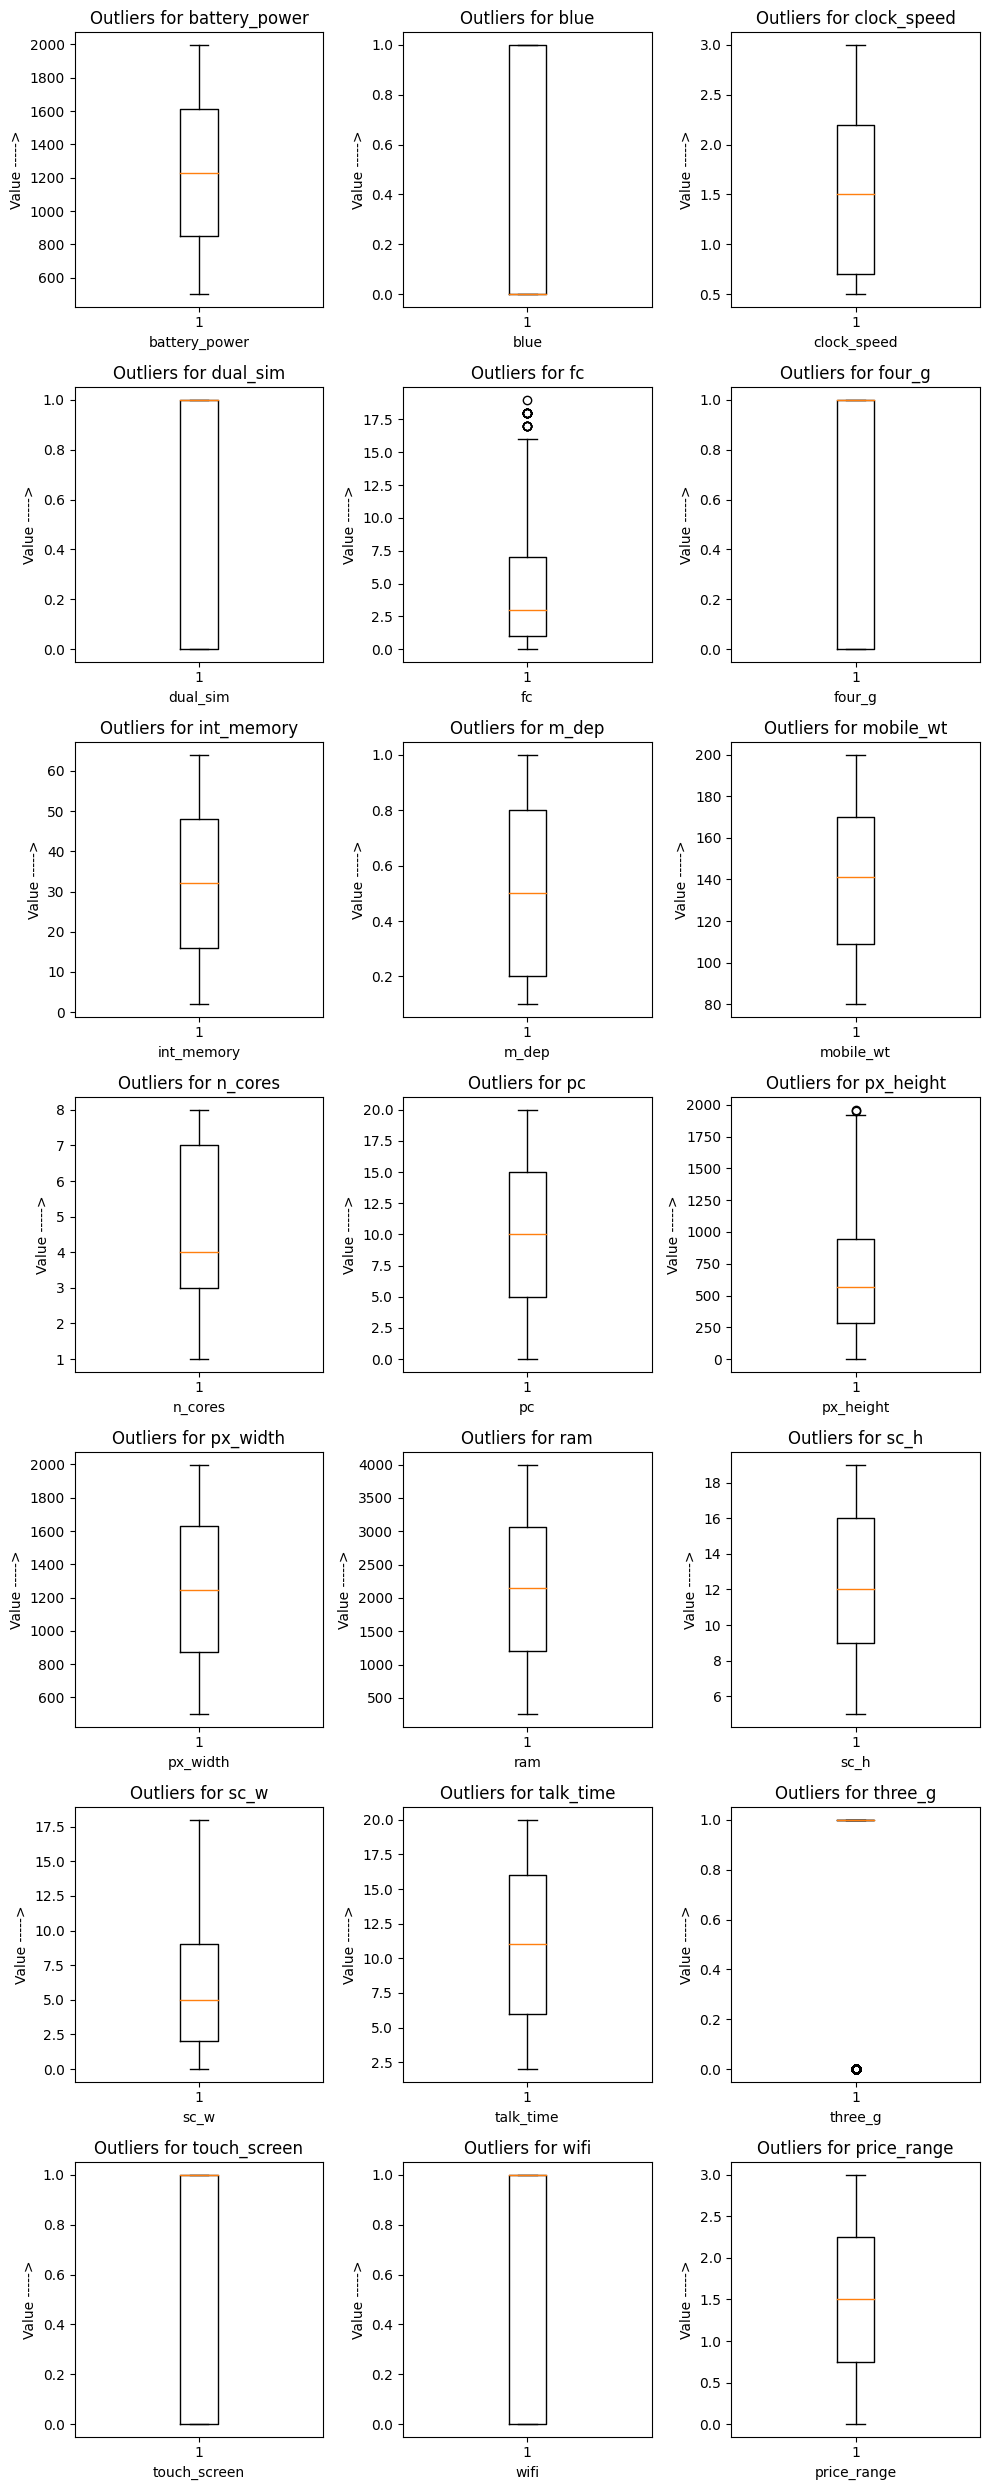

In [38]:
outlier_detection(df,7,3)

In [39]:
# Removing Outliers & Outlier treatments using IQR method
def IQR(feature,df_name):
 percentile25 = df_name[feature].quantile(0.25)
 percentile75 = df_name[feature].quantile(0.75)
 iqr = percentile75 - percentile25
 upper_limit = percentile75 + 1.5 * iqr
 lower_limit = percentile25 - 1.5 * iqr
 # using capping to substitute upper limit and lower limits values where we have outliers
 df[feature] = np.where(df[feature] > upper_limit,upper_limit,
    np.where(
        df[feature] < lower_limit,
        lower_limit,
        df[feature]
    )
 )
 df[feature].plot(kind='box');

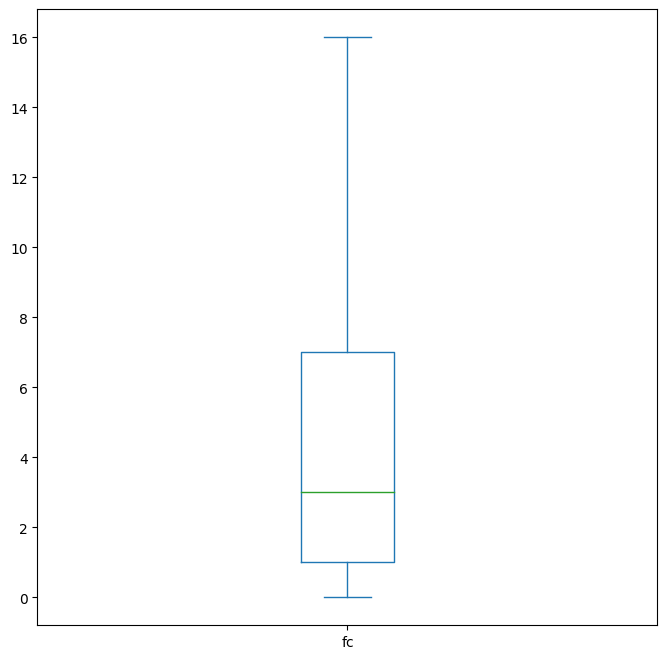

In [40]:
IQR('fc',df)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [41]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [42]:
# Expand Contraction

#### 2. Lower Casing

In [43]:
# Lower Casing

#### 3. Removing Punctuations

In [44]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [45]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [46]:
# Remove Stopwords

In [47]:
# Remove White spaces

#### 6. Rephrase Text

In [48]:
# Rephrase Text

#### 7. Tokenization

In [49]:
# Tokenization

#### 8. Text Normalization

In [50]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [51]:
# POS Taging

#### 10. Text Vectorization

In [52]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [53]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [54]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.


### 5. Data Splitting

In [77]:
# splitting data into train and test set
x = df.drop('price_range', axis=1)
y = df['price_range']

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state =42)

##### What data splitting ratio have you used and why?

Answer Here.

### 6. Data Scaling

In [79]:
# Scaling your data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

Answer Here.

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [57]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

### 8. Data Transformation

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [59]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

# **Random Forest Classifier**

In [80]:
# Define the hyperparameter grid for RandomSearchCV
param_grid = {
     'n_estimators': np.arange(50, 201, 10),
    'max_depth': [None] + list(np.arange(10, 21, 2)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5)
}
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier()

In [81]:
# Performing RandomSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=rf_classifier, param_distributions=param_grid,
    n_iter=50, cv=5, n_jobs=-1, random_state=42
)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 12, 14, 16, 18,
                                                      20],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200])},
                   random_state=42)

In [82]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Best hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 14}
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        80
           1       0.86      0.88      0.87        72
           2       0.84      0.82      0.83        68
           3       0.91      0.93      0.92        80

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

Accuracy Score: 89.33333333333333


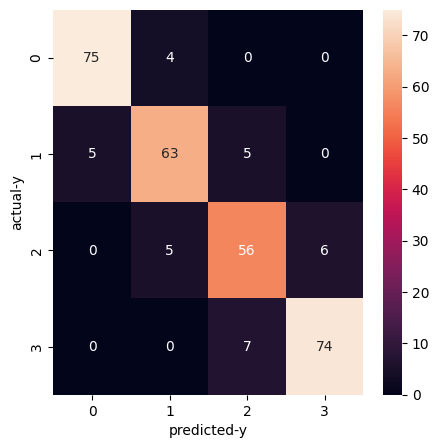

In [103]:
# Visualizing evaluation Metric Score chart
# Evaluating the model
y_pred_rf = best_rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Best hyperparameters:", best_params)
print(classification_report(y_test,y_pred_rf))
print("Accuracy Score:",accuracy_score(y_test,y_pred_rf)*100)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred_rf,y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#**XGboost Classifier with RandomizedSearchCV**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [89]:
import xgboost as xgb

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

In [90]:
# Define the hyperparameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': np.arange(50, 201, 10),
    'max_depth': np.arange(3, 11),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_weight': np.arange(1, 6),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [0, 0.01, 0.1, 1, 10]
}


In [91]:
# Perform RandomizedSearchCV to find the best hyperparameters
random_search_cv = RandomizedSearchCV(
    estimator=xgb_classifier, param_distributions=param_distributions,
    n_iter=50, cv=5, n_jobs=-1, random_state=42
)

In [92]:
# using random search cv
random_search_cv.fit(x_train, y_train)

In [93]:
# finding out the best parameter
best_params_xg = random_search_cv.best_params_
best_xgb_model_xg = random_search_cv.best_estimator_

Best hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 14}
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        80
           1       0.92      0.92      0.92        72
           2       0.85      0.90      0.87        68
           3       0.95      0.90      0.92        80

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Accuracy Score: 92.0


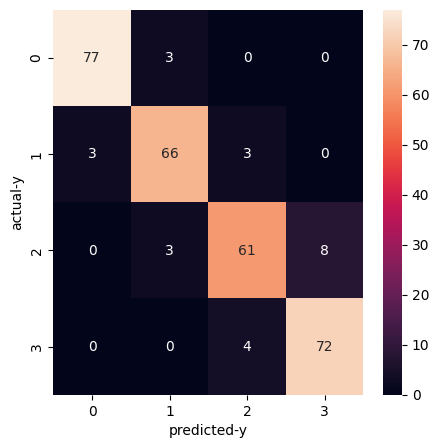

In [97]:
# Visualizing evaluation Metric Score chart
y_pred = best_xgb_model_xg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best hyperparameters:", best_params)
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

#**Logistic Regression with GridSearchCV**

In [98]:
log_reg = LogisticRegression()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


In [99]:
grid_search_lg = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)
grid_search_lg.fit(x_train,y_train)

# Get the best hyperparameters and the best model
best_params_lg = grid_search_lg.best_params_
best_log_reg_model = grid_search_lg.best_estimator_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        80
           1       0.94      1.00      0.97        72
           2       0.99      0.97      0.98        68
           3       0.98      0.99      0.98        80

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Best hyperparameters: {'C': 100, 'solver': 'newton-cg'}
Test set accuracy: 0.9733333333333334


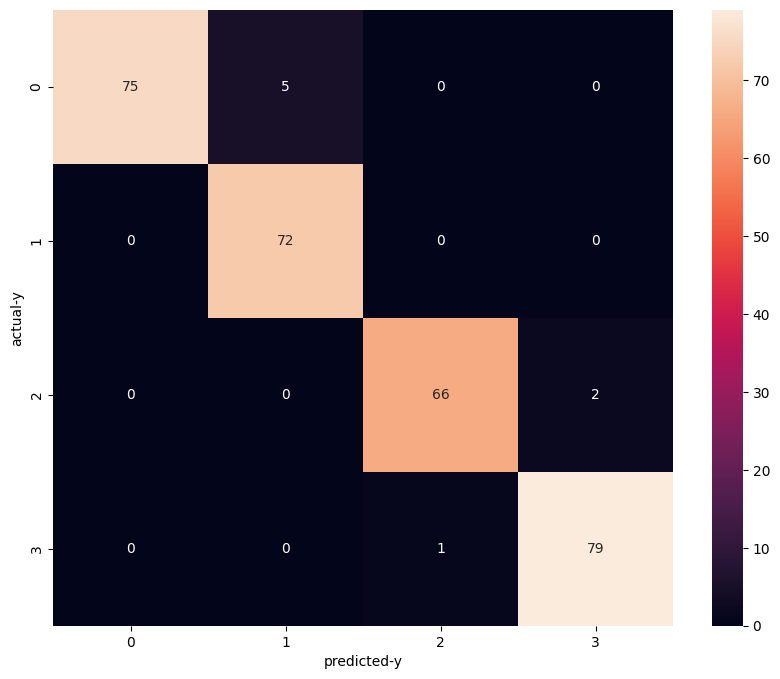

In [101]:
# Visualizing evaluation Metric Score chart
# Evaluating the model
y_pred_lg = best_log_reg_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_lg)
print(classification_report(y_test,y_pred_lg))
print("Best hyperparameters:", best_params_lg)
print("Test set accuracy:", accuracy)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred_lg),annot=True)
plt.xlabel('predicted-y')
plt.ylabel('actual-y');


#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [68]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [69]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***